In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from sklearn.metrics import roc_auc_score

In [2]:
df = pd.read_csv('masterfile-2024.csv', sep=';')

In [3]:
df['ground_truth'] = df['Overall'].apply(lambda x: True if x >= 2 else False)

# Labels
- True = non-maintainable, i.e., a file that is a problem to maintain
- False = maintainable file, i.e., a file that is not a problem to maintain

In [4]:
def get_codescene_matrix(df, CH_lowest=2, CH_highest=10.01, CH_stepsize=0.01):
    """
    Classifies each file as 'maintainable' or 'not maintainable' based on the code_health score.
    The classification result for each threshold is stored in a new column in a new DataFrame.
    
    Parameters:
    - df: Pandas DataFrame containing the files data.
    - CH_lowest: The lowest threshold of code_health to consider.
    - CH_highest: The highest threshold of code_health to consider.
    - CH_stepsize: The step size to increment the threshold.
    
    Returns:
    - df_codescene: A new DataFrame with each column representing a classification result at each threshold.
    """
    
    # Ensure code_health is numeric
    df['code_health'] = pd.to_numeric(df['code_health'], errors='coerce')
    
    # Initialize an empty DataFrame to store classification results
    df_codescene = pd.DataFrame(index=df.index)
    
    # Generate thresholds
    thresholds = np.arange(CH_lowest, CH_highest + CH_stepsize, CH_stepsize)
    
    # Classify at each threshold
    for threshold in thresholds:
        # Column name indicating the threshold
        column_name = f"CH_{threshold:.3f}"
        # Apply classification based on current threshold
        df_codescene[column_name] = df['code_health'].apply(lambda x: True if x < threshold else False)
        
    return df_codescene

In [5]:
def get_sonarqube_ratio_matrix(df, ratio_lowest=0, ratio_highest=0.4, ratio_stepsize=0.005):
    """
    Classifies each file as 'maintainable' or 'not maintainable' based on the TD_ratio.
    The classification result for each threshold is stored in a new column in a new DataFrame.
    """
    
    # Ensure code_health is numeric
    df['TD_ratio'] = pd.to_numeric(df['TD_ratio'], errors='coerce')
    
    # Initialize an empty DataFrame to store classification results
    df_sonarqube_ratio = pd.DataFrame(index=df.index)
    
    # Generate thresholds
    thresholds = np.arange(ratio_lowest, ratio_highest + ratio_stepsize, ratio_stepsize)
    
    # Classify at each threshold
    for threshold in thresholds:
        # Column name indicating the threshold
        column_name = f"ratio_{threshold:.3f}"
        # Apply classification based on current threshold
        df_sonarqube_ratio[column_name] = df['TD_ratio'].apply(lambda x: True if x >= threshold else False)
        
    return df_sonarqube_ratio

In [6]:
def get_sonarqube_time_matrix(df, time_lowest=0, time_highest=1800, time_stepsize=5):
    """
    Classifies each file as 'maintainable' or 'not maintainable' based on the estimated remediation time.
    The classification result for each threshold is stored in a new column in a new DataFrame.
    """
    
    # Ensure code_health is numeric
    df['TD_time'] = pd.to_numeric(df['TD_time'], errors='coerce')
    
    # Initialize an empty DataFrame to store classification results
    df_sonarqube_time = pd.DataFrame(index=df.index)
    
    # Generate thresholds
    thresholds = np.arange(time_lowest, time_highest + time_stepsize, time_stepsize)
    
    # Classify at each threshold
    for threshold in thresholds:
        # Column name indicating the threshold
        column_name = f"time_{threshold}"
        # Apply classification based on current threshold
        df_sonarqube_time[column_name] = df['TD_time'].apply(lambda x: True if x >= threshold else False)
        
    return df_sonarqube_time

In [7]:
df_codescene = get_codescene_matrix(df)
df_sonarqube_ratio = get_sonarqube_ratio_matrix(df)
df_sonarqube_time = get_sonarqube_time_matrix(df)

/var/folders/1g/r7vjn7113r5_v0rymj6kbtvr0000gn/T/ipykernel_51884/3842662599.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_codescene[column_name] = df['code_health'].apply(lambda x: True if x < threshold else False)
/var/folders/1g/r7vjn7113r5_v0rymj6kbtvr0000gn/T/ipykernel_51884/3842662599.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_codescene[column_name] = df['code_health'].apply(lambda x: True if x < threshold else False)
/var/folders/1g/r7vjn7113r5_v0rymj6kbtvr0000gn/T/ipykernel_51884/3842662599.py:30: P

In [8]:
df_codescene

,CH_2.000,CH_2.010,CH_2.020,CH_2.030,CH_2.040,CH_2.050,CH_2.060,CH_2.070,CH_2.080,CH_2.090,...,CH_9.920,CH_9.930,CH_9.940,CH_9.950,CH_9.960,CH_9.970,CH_9.980,CH_9.990,CH_10.000,CH_10.010
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
300,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
301,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
302,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


# TPR and FPR calculation

In [9]:
def calculate_tpr_fpr_at_thresholds(df, df_pred, ground_truth_column):
    """
    Calculates TPR and FPR for each threshold classification in df_codescene,
    using a specified ground truth column from the original dataframe.
    """
    binary_ground_truth = df[ground_truth_column].astype(int)
    
    tpr_fpr_scores = {}
    for column in df_pred.columns:
        binary_predictions = df_pred[column].astype(int)
        
        # Calculate True Positives (TP), False Positives (FP), True Negatives (TN), and False Negatives (FN)
        TP = ((binary_predictions == 1) & (binary_ground_truth == 1)).sum()
        FP = ((binary_predictions == 1) & (binary_ground_truth == 0)).sum()
        TN = ((binary_predictions == 0) & (binary_ground_truth == 0)).sum()
        FN = ((binary_predictions == 0) & (binary_ground_truth == 1)).sum()
        
        # Avoid division by zero
        if (TP + FN) == 0 or (FP + TN) == 0:
            print(f"Skipping {column} due to division by zero in TPR or FPR calculation.")
            continue
        
        # Calculate TPR and FPR
        TPR = TP / (TP + FN)
        FPR = FP / (FP + TN)
        
        tpr_fpr_scores[column] = {'TPR': TPR, 'FPR': FPR}
        
    return tpr_fpr_scores

In [10]:
tpr_fpr_codescene = calculate_tpr_fpr_at_thresholds(df, df_codescene, "ground_truth")
tpr_fpr_sonarqube_ratio = calculate_tpr_fpr_at_thresholds(df, df_sonarqube_ratio, "ground_truth")
tpr_fpr_sonarqube_time = calculate_tpr_fpr_at_thresholds(df, df_sonarqube_time, "ground_truth")

In [11]:
# Extracting TPR and FPR values along with their corresponding thresholds
thresholds_codescene = [float(th.split('_')[1]) for th in tpr_fpr_codescene.keys()]
tpr_values_codescene = [vals['TPR'] for vals in tpr_fpr_codescene.values()]
fpr_values_codescene = [vals['FPR'] for vals in tpr_fpr_codescene.values()]
thresholds_sonarqube_ratio = [float(th.split('_')[1]) for th in tpr_fpr_sonarqube_ratio.keys()]
tpr_values_sonarqube_ratio = [vals['TPR'] for vals in tpr_fpr_sonarqube_ratio.values()]
fpr_values_sonarqube_ratio = [vals['FPR'] for vals in tpr_fpr_sonarqube_ratio.values()]
thresholds_sonarqube_time = [float(th.split('_')[1]) for th in tpr_fpr_sonarqube_time.keys()]
tpr_values_sonarqube_time = [vals['TPR'] for vals in tpr_fpr_sonarqube_time.values()]
fpr_values_sonarqube_time = [vals['FPR'] for vals in tpr_fpr_sonarqube_time.values()]

# ROC curves

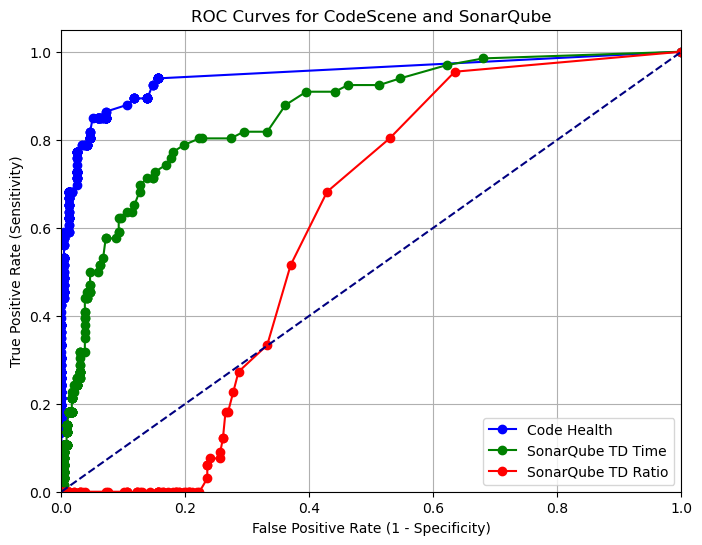

In [12]:
# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_values_codescene, tpr_values_codescene, marker='o', linestyle='-', color='blue', label='Code Health')
plt.plot(fpr_values_sonarqube_time, tpr_values_sonarqube_time, marker='o', linestyle='-', color='green', label='SonarQube TD Time')
plt.plot(fpr_values_sonarqube_ratio, tpr_values_sonarqube_ratio, marker='o', linestyle='-', color='red', label='SonarQube TD Ratio')

# Plotting the diagonal line from (0,0) to (1,1)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curves for CodeScene and SonarQube')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# AUC calculations

In [13]:
# Convert to numpy arrays for easier manipulation
fpr_array_codescene = np.array(fpr_values_codescene)
tpr_array_codescene = np.array(tpr_values_codescene)

# Sort the arrays by FPR values
sorted_indices_codescene = np.argsort(fpr_array_codescene)
sorted_fpr_codescene = fpr_array_codescene[sorted_indices_codescene]
sorted_tpr_codescene = tpr_array_codescene[sorted_indices_codescene]

# Calculate AUC using the trapezoidal rule
auc_codescene = integrate.trapz(y=sorted_tpr_codescene, x=sorted_fpr_codescene)

print(f"Calculated AUC (CodeScene): {auc_codescene}")

Calculated AUC (CodeScene): 0.9459829386299975


In [14]:
fpr_array_sonarqube_ratio = np.array(fpr_values_sonarqube_ratio)
tpr_array_sonarqube_ratio = np.array(tpr_values_sonarqube_ratio)

# Sort the arrays by FPR values
sorted_indices_sonarqube_ratio = np.argsort(fpr_array_sonarqube_ratio)
sorted_fpr_sonarqube_ratio = fpr_array_sonarqube_ratio[sorted_indices_sonarqube_ratio]
sorted_tpr_sonarqube_ratio = tpr_array_sonarqube_ratio[sorted_indices_sonarqube_ratio]

# Calculate AUC using the trapezoidal rule
auc_sonarqube_ratio = integrate.trapz(y=sorted_tpr_sonarqube_ratio, x=sorted_fpr_sonarqube_ratio)

print(f"Calculated AUC (SonarQube TD Ratio): {auc_sonarqube_ratio}")

Calculated AUC (SonarQube TD Ratio): 0.5970842882607588


In [15]:
fpr_array_sonarqube_time = np.array(fpr_values_sonarqube_time)
tpr_array_sonarqube_time = np.array(tpr_values_sonarqube_time)

# Sort the arrays by FPR values
sorted_indices_sonarqube_time = np.argsort(fpr_array_sonarqube_time)
sorted_fpr_sonarqube_time = fpr_array_sonarqube_time[sorted_indices_sonarqube_time]
sorted_tpr_sonarqube_time = tpr_array_sonarqube_time[sorted_indices_sonarqube_time]

# Calculate AUC using the trapezoidal rule
auc_sonarqube_time = integrate.trapz(y=sorted_tpr_sonarqube_time, x=sorted_fpr_sonarqube_time)

print(f"Calculated AUC (SonarQube TD Remediation Time): {auc_sonarqube_time}")

Calculated AUC (SonarQube TD Remediation Time): 0.8601986249045073
